In [3]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 1.1 MB/s eta 0:00:01
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894069 sha256=fe0e429fc7f83e5b7f536d17f8af4bd5596eec19d67df60b49be44746ce8f45c
  Stored in directory: /Users/vomelenchuk/Library/Caches/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

To begin, let's define the input variables for our fuzzy system. In this example, let's say we're trying to predict the amount of time a person will spend exercising based on their age and activity level.

In [5]:
# Define input variables
age = ctrl.Antecedent(np.arange(0, 101, 1), 'age')
activity_level = ctrl.Antecedent(np.arange(0, 11, 1), 'activity_level')

Next, let's define the output variable, which is the amount of time spent exercising.

In [6]:
# Define output variable
exercise_time = ctrl.Consequent(np.arange(0, 61, 1), 'exercise_time')


Now, let's define the fuzzy membership functions for each of the input and output variables. This is where we specify how certain inputs map to certain outputs based on the rules we define.

In [7]:
# Define membership functions
age.automf(3)
activity_level.automf(3)
exercise_time['low'] = fuzz.trimf(exercise_time.universe, [0, 0, 30])
exercise_time['medium'] = fuzz.trimf(exercise_time.universe, [0, 30, 60])
exercise_time['high'] = fuzz.trimf(exercise_time.universe, [30, 60, 60])

With the membership functions defined, we can now create the rules for our fuzzy system. These rules specify the relationship between the input and output variables.

In [8]:
# Define fuzzy rules
rule1 = ctrl.Rule(age['poor'] & activity_level['poor'], exercise_time['low'])
rule2 = ctrl.Rule(age['average'] & activity_level['average'], exercise_time['medium'])
rule3 = ctrl.Rule(age['good'] & activity_level['good'], exercise_time['high'])

Finally, we can create a control system using the antecedents, consequents, and rules we defined.

In [9]:
# Create control system
exercise_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
exercise = ctrl.ControlSystemSimulation(exercise_ctrl)

Now we have a fuzzy logic-based machine learning model for predicting the amount of time a person will spend exercising based on their age and activity level. We can use this model to make predictions by specifying the values for age and activity_level.

In [21]:
# Use model to make predictions
exercise.input['age'] = 25
exercise.input['activity_level'] = 3
exercise.compute()

# Result of model simulation
print(exercise.output['exercise_time'])

27.49397590361446


# Using data from pandas dataframe

In [44]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Generate sample data
ages = np.random.randint(5, 100, size=100)
activity_levels = np.random.randint(1, 9, size=100)

# Store the data in a Pandas DataFrame
df = pd.DataFrame({'age': ages, 'activity_level': activity_levels})

# Define input variables
age = ctrl.Antecedent(np.arange(0, 100, 1), 'age')
activity_level = ctrl.Antecedent(np.arange(0, 11, 1), 'activity_level')

# Define output variable
exercise_time = ctrl.Consequent(np.arange(0, 61, 1), 'exercise_time')

# Define membership functions
age.automf(3)
activity_level.automf(3)
exercise_time['low'] = fuzz.trimf(exercise_time.universe, [0, 0, 30])
exercise_time['medium'] = fuzz.trimf(exercise_time.universe, [0, 30, 60])
exercise_time['high'] = fuzz.trimf(exercise_time.universe, [30, 60, 60])

# Define fuzzy rules
rule1 = ctrl.Rule(age['poor'] & activity_level['poor'], exercise_time['low'])
rule2 = ctrl.Rule(age['average'] & activity_level['average'], exercise_time['medium'])
rule3 = ctrl.Rule(age['good'] & activity_level['good'], exercise_time['high'])

# Create control system
exercise_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
exercise = ctrl.ControlSystemSimulation(exercise_ctrl)

# Use model to make predictions for each row in the DataFrame
predictions = []
for i, row in df.iterrows():
    exercise.input['age'] = row['age']
    exercise.input['activity_level'] = row['activity_level']
    exercise.compute()
    predictions.append(exercise.output['exercise_time'])

# Add the predictions to the DataFrame as a new column
df['predicted_exercise_time'] = predictions

In [48]:
df.head()

,age,activity_level,predicted_exercise_time
0,14,8,30.000000
1,48,8,30.000000
2,26,5,30.000000
3,47,4,29.956760
4,44,4,29.812061


<AxesSubplot:>

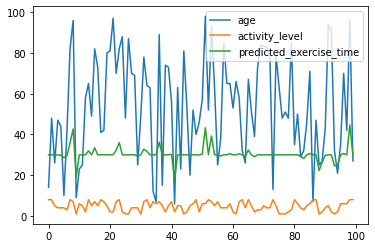

In [47]:
df.plot()